In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("Airbnb_Data.csv")

In [3]:
df.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [14]:
print("Initial Data Shape:", df.shape)

Initial Data Shape: (74111, 29)


In [15]:
print(df.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


In [23]:
df[['bathrooms', 'beds', 'bedrooms']].dtypes

bathrooms    float64
beds         float64
bedrooms     float64
dtype: object

In [31]:
df[['bathrooms', 'beds','bedrooms','neighbourhood','review_scores_rating']].isnull().sum()

bathrooms               74111
beds                    74111
bedrooms                74111
neighbourhood               0
review_scores_rating        0
dtype: int64

In [27]:
df['bathrooms']=df['bathrooms'].fillna(df['bathrooms'].median())
df['beds']=df['beds'].fillna(df['beds'].median())
df['bedrooms']=df['bedrooms'].fillna(df['bedrooms'].median())
df['neighbourhood']=df['neighbourhood'].fillna("Unknown")
df['review_scores_rating']=df['review_scores_rating'].fillna(df['review_scores_rating'].median())


c:\Users\user\python tut\pythonProject1\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\user\python tut\pythonProject1\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\user\python tut\pythonProject1\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [32]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,0.0,74111.000000,74111.000000,74111.000000,74111.000000,0.0,0.0
mean,1.126662e+07,4.782069,3.155146,NaN,38.445958,-92.397525,20.900568,94.503434,NaN,NaN
std,6.081735e+06,0.717394,2.153589,NaN,3.080167,21.705322,37.828641,6.943159,NaN,NaN
min,3.440000e+02,0.000000,1.000000,NaN,33.338905,-122.511500,0.000000,20.000000,NaN,NaN
25%,6.261964e+06,4.317488,2.000000,NaN,34.127908,-118.342374,1.000000,93.000000,NaN,NaN
50%,1.225415e+07,4.709530,2.000000,NaN,40.662138,-76.996965,6.000000,96.000000,NaN,NaN
75%,1.640226e+07,5.220356,4.000000,NaN,40.746096,-73.954660,23.000000,99.000000,NaN,NaN
max,2.123090e+07,7.600402,16.000000,NaN,42.390437,-70.985047,605.000000,100.000000,NaN,NaN


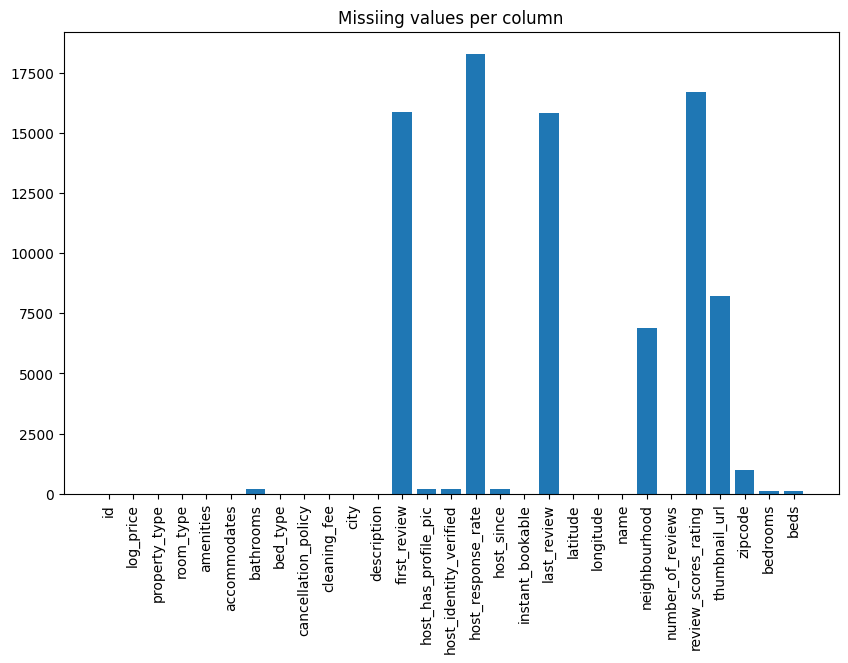

In [12]:
missing=df.isnull().sum()
plt.figure(figsize=(10,6))
plt.bar(missing.index, missing.values)
plt.xticks(rotation=90)
plt.title("Missiing values per column")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

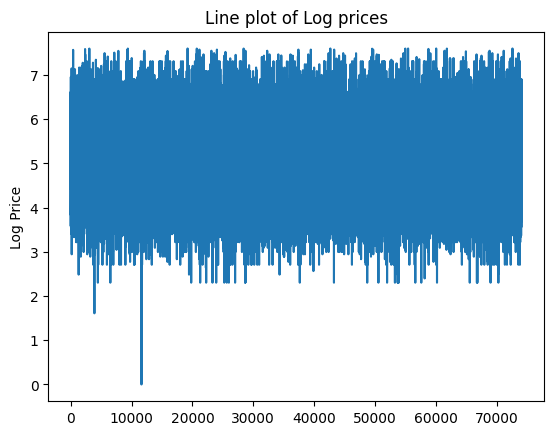

In [13]:
df['log_price'].plot()
plt.ylabel("Log Price")
plt.title("Line plot of Log prices")
plt.show

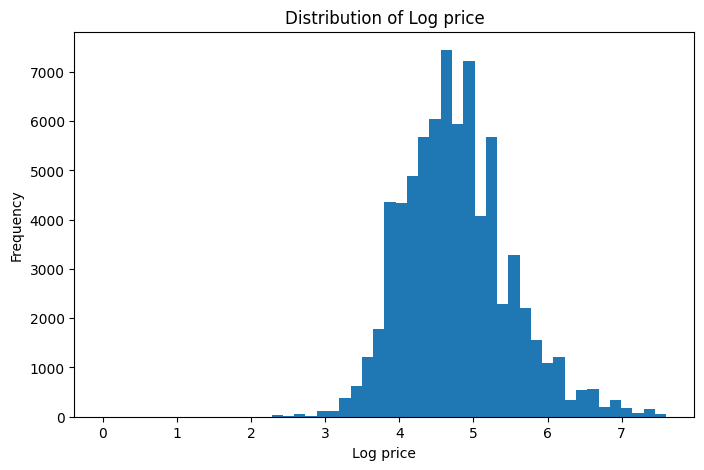

In [13]:
plt.figure(figsize=(8,5))
plt.hist(df['log_price'], bins=50)
plt.title("Distribution of Log price")
plt.xlabel("Log price")
plt.ylabel("Frequency")
plt.show()

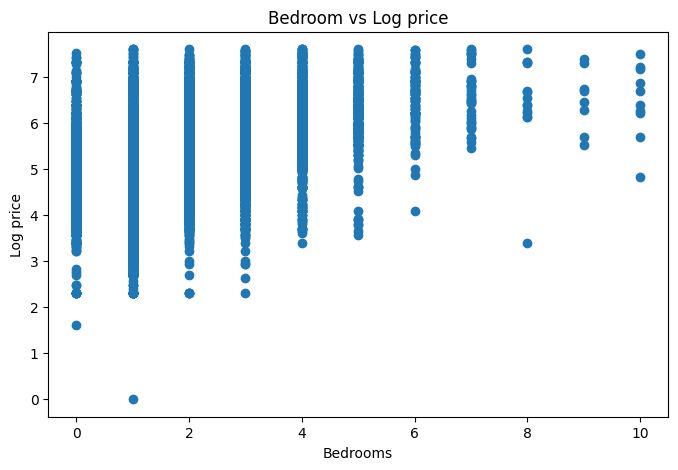

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(df['bedrooms'],df['log_price'])
plt.xlabel("Bedrooms")
plt.ylabel("Log price")
plt.title("Bedroom vs Log price")
plt.show()

In [15]:
df[['bedrooms','log_price']].corr()

,bedrooms,log_price
bedrooms,1.000000,0.473212
log_price,0.473212,1.000000


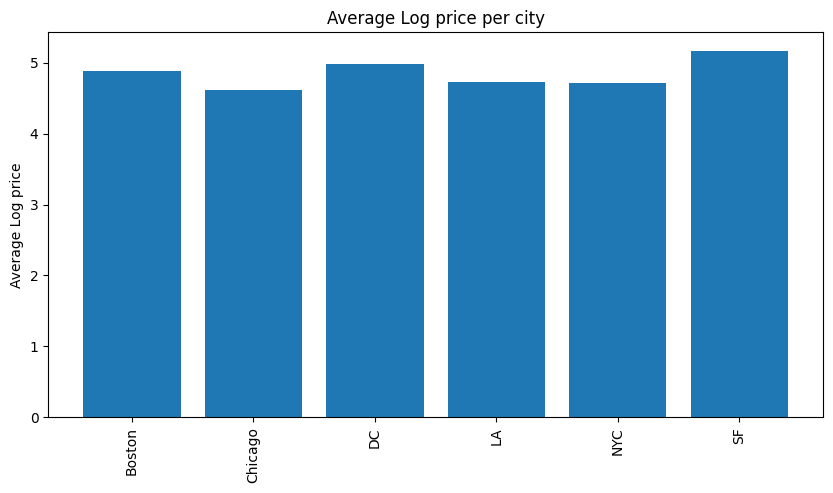

In [16]:
city_price=df.groupby('city')['log_price'].mean()
plt.figure(figsize=(10,5))
plt.bar(city_price.index, city_price.values)
plt.xticks(rotation=90)
plt.title("Average Log price per city")
plt.ylabel("Average Log price")
plt.show()

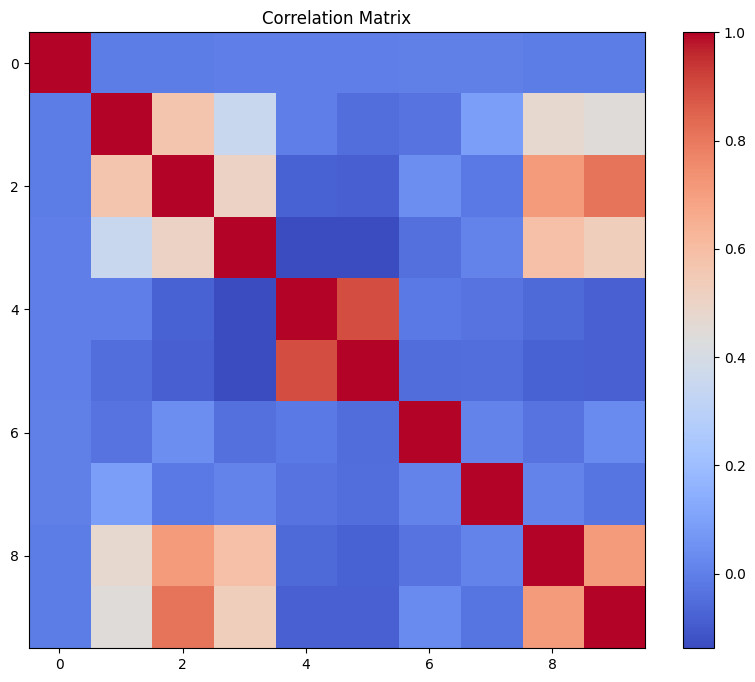

In [17]:
import numpy as np
numeric_df=df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,8))
plt.imshow(numeric_df.corr(),cmap='coolwarm')
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

<Figure size 800x500 with 0 Axes>

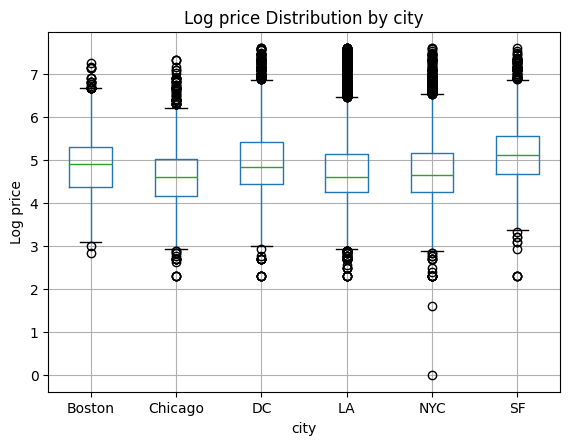

In [18]:
plt.figure(figsize=(8,5))
df.boxplot(column='log_price', by='city')
plt.title("Log price Distribution by city")
plt.suptitle("")
plt.ylabel("Log price")
plt.show()

In [19]:
Q1=df['log_price'].quantile(0.25)
Q3=df['log_price'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=df[(df['log_price']<lower_bound) |
         (df['log_price']>upper_bound)]

print(len(outliers))

1532


In [20]:
df.corr(numeric_only=True)['log_price'].sort_values(ascending=False)

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355420
cleaning_fee            0.111191
review_scores_rating    0.091219
latitude               -0.002193
id                     -0.007178
number_of_reviews      -0.032470
longitude              -0.047529
Name: log_price, dtype: float64

In [25]:
type(df)

pandas.core.frame.DataFrame

In [31]:
type(df['log_price'])
type(df['property_type'])

pandas.core.series.Series

In [35]:
type(df['property_type'])

pandas.core.series.Series

In [36]:
df.head

<bound method NDFrame.head of              id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cab

In [37]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [38]:
df.columns=df.columns.str.strip()

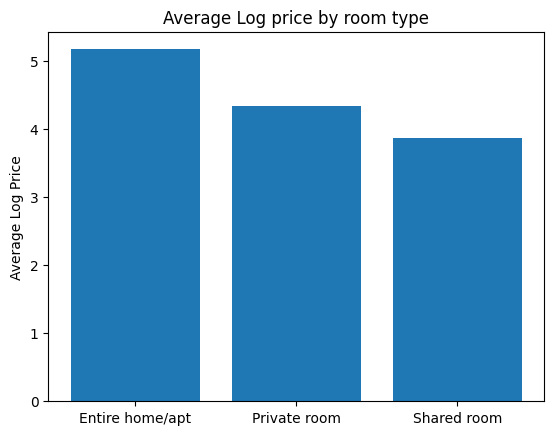

In [23]:
room_price=df.groupby('room_type')['log_price'].mean()
plt.bar(room_price.index, room_price.values)
plt.title("Average Log price by room type")
plt.ylabel("Average Log Price")
plt.show()

In [4]:
grouped=df.groupby('property_type')
log_prices=grouped['log_price']
prop_price=log_prices.mean().sort_values()
print(prop_price.head())

property_type
Hostel             3.647333
Dorm               3.746140
Hut                4.022837
Tent               4.197131
Casa particular    4.382027
Name: log_price, dtype: float64


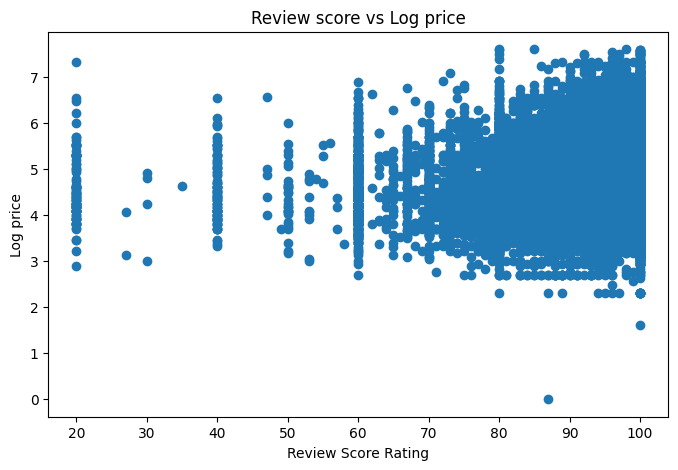

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(df['review_scores_rating'],df['log_price'])
plt.xlabel("Review Score Rating")
plt.ylabel("Log price")
plt.title("Review score vs Log price")
plt.show()

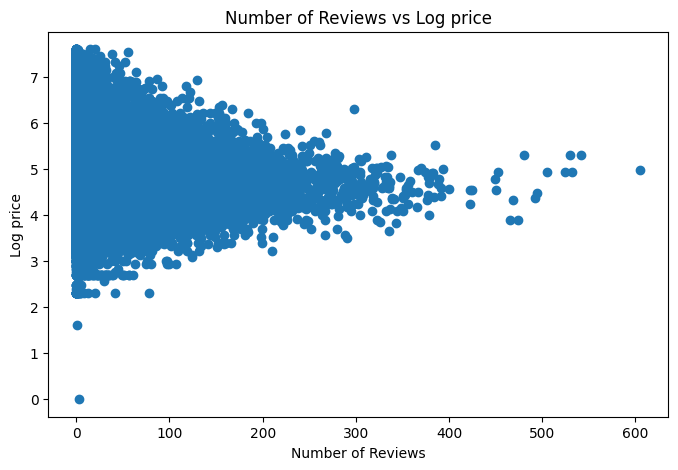

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(df['number_of_reviews'],df['log_price'])
plt.xlabel("Number of Reviews")
plt.ylabel("Log price")
plt.title("Number of Reviews vs Log price")
plt.show()


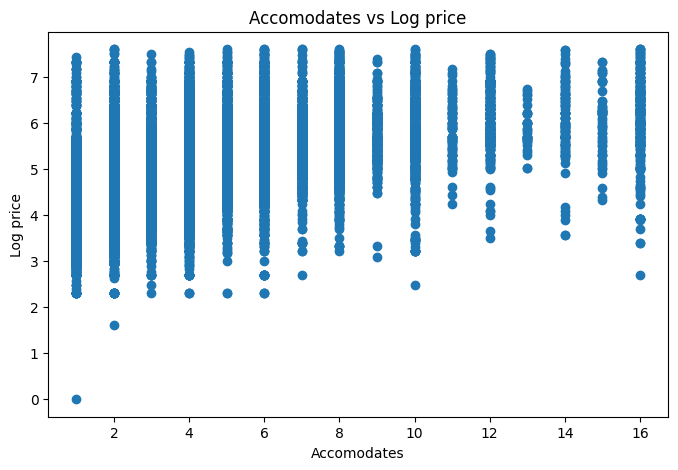

In [52]:
plt.figure(figsize=(8,5))
plt.scatter(df['accommodates'],df['log_price'])
plt.xlabel("Accomodates")
plt.ylabel("Log price")
plt.title("Accomodates vs Log price")
plt.show()

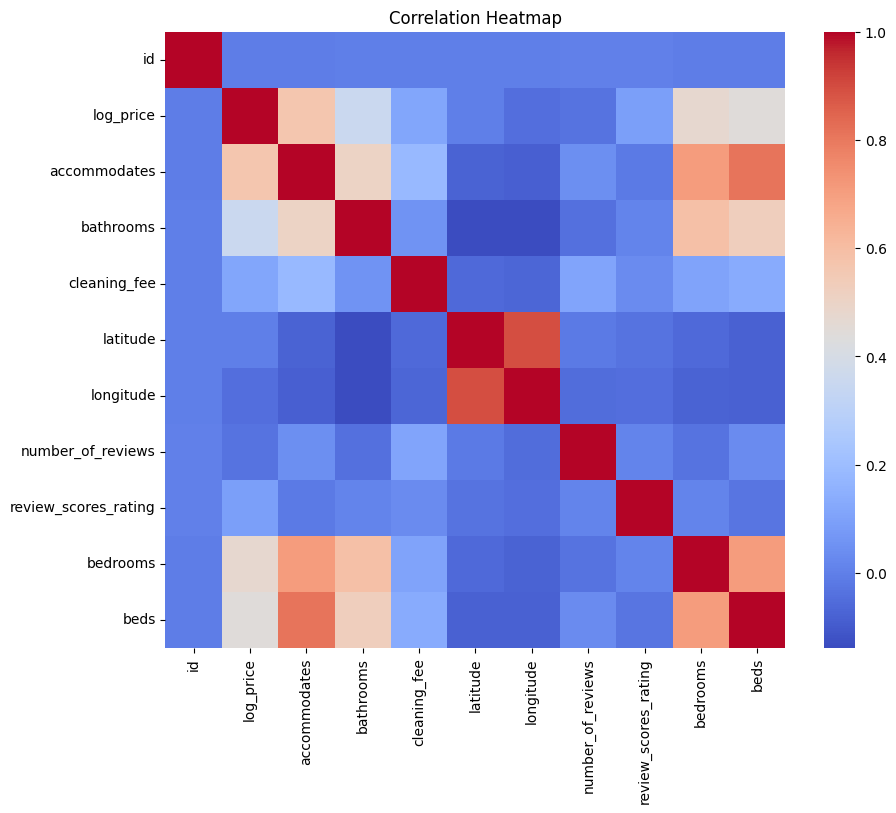

In [10]:
import seaborn as sns

plt.figure(figsize=(10,8))
corr=df.corr(numeric_only=True)
sns.heatmap(corr,cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
corr_log=df.corr(numeric_only=True)['log_price'].sort_values(ascending=False)
print(corr_log)

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355420
cleaning_fee            0.111191
review_scores_rating    0.091219
latitude               -0.002193
id                     -0.007178
number_of_reviews      -0.032470
longitude              -0.047529
Name: log_price, dtype: float64


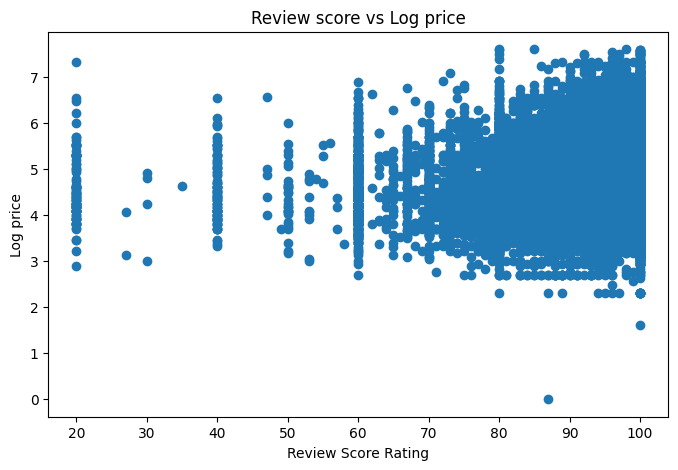

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['review_scores_rating'],df['log_price'])
plt.xlabel("Review Score Rating")
plt.ylabel("Log price")
plt.title("Review score vs Log price")
plt.show()